# **Set-up**

## Mount Home Directory
Mount Google Drive to access files from local directory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Import Packages
Import necessary python packages:

*   `csv`: for csv files
*   `pandas`: to turn contents of the csv into a dataframe object for analysis
*   `matplotlib.pyplot`: used for plotting; compatible with pandas
*   `numpy`: to perform mathematical operations
*   `scipy.optimize`: used for curve fitting
*   `scipy.stats`:







In [ ]:
import csv
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.interpolate import make_interp_spline
import seaborn as sns

## Define Global Variables
Define global variables for parameters used in various parts of the code.


*   RITbins: values of the binning boundaries for RIT score distributions. Based on the Learning Continuum
*   RITticks: used to mark bin boundaries in plots.
*   RITmids: values of the mid points of each RIT bin. used in calculations
*   Grds: values of the grade levels. Used to assign x-values to certain data points
*   Grdbins: values of the grade levels used for binning in histograms and fitting
*   Grdticks: values of the grade levels.

### Plotting parameters
Includes bin sizes, axes ticks, midpoints, and finer x-axis values in an array (using linspace) for plotting smooth functions

In [ ]:
#binnings, axes ticks, and midpoints
RITbins  = [140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260]
RITticks = [140, 160, 180, 200, 220, 240, 260]
RITmids  = [   145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255  ]
Grwbins  = [-40,   -35,  -30,   -25,   -20,   -15,   -10,   -5,   0,   5,   10,   15,   20,   25,   30,   35,   40]
Grwticks = [-40, -30, -20, -10, 0, 10, 20, 30, 40]
Grwmids  = [  -37.5, -32.5, -27.5, -22.5, -17.5, -12.5, -7.5, -2.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5]
Grds     = [3, 4, 5, 6]
Grdbins  = [3, 4, 5, 6, 7]
Grdticks = [3, 4, 5, 6, 7]

#Finer x-axis values: for plotting functions to line graphs
x_ritFit = np.linspace(140, 260, 100)
x_growthFit = np.linspace(-40, 40, 100)
x_grdFit = np.linspace(2.5, 6.5, 100)

#x-axis erros/bin sizes: defines the error bars of datapoints along the x-axis to span the bin size.
xerr_RIT = (RITbins[1] - RITbins[0]) / 2 # Half of the bin width for x-error
xerr_grw = 2.5

### NWEA MAP Growth 2025 Norms
RIT Achievement norm means and standard deviations are taken from Appendix A of the 2025 MAP Growth Norms Technical Manual (https://www.nwea.org/resource-center/resource/2025-map-growth-norms-technical-manual/).


#### Definition
Norms taken start from Grade 2 up to Grade 7.
Fall, Winter, and Spring norms are defined for 4, 20, and 32 weeks of instruction, respectively, out of 43 weeks per academic year.

#### Progression
The expected achievement progression is modeled from the Achievement RIT Norm means as a smooth function over the (cumulative) number of weeks of instruction using a cubic spline interpolation.

In [ ]:
#Weeks of Instruction:
## - Starting Grade 2 (0 weeks) up to Grade 7, with 43 weeks of instruction per academic year.
## Fall (0-4-12), Winter (13-20-28), Spring (29-32-43)

norm2025_weeksOfInstruction = [    4,     20,     32,
                                43+4,  43+20,  43+32,
                                86+4,  86+20,  86+32,
                               129+4, 129+20, 129+32,
                               172+4, 172+20, 172+32,
                               215+4, 215+20, 215+32
                              ]
x_wksOfInst = np.linspace(0, 290, 300)

norm2025_Reading_RITmean = [170.06, 176.70, 181.68,
                             184.69, 189.89, 193.79,
                             195.92, 199.45, 202.09,
                             203.67, 206.36, 208.37,
                             208.95, 210.72, 212.04,
                             212.34, 213.77, 214.83
                            ]

norm2025_Reading_RITInterSpline = make_interp_spline(norm2025_weeksOfInstruction, norm2025_Reading_RITmeans, k=3)
norm2025_Reading_RITFunc = norm2025_Reading_RITInterSpline(x_wksOfInst)

norm2025_Reading_RITstdv = [17.13, 17.14, 17.34,
                            18.30, 18.13, 18.15,
                            17.99, 17.76, 17.74,
                            17.45, 17.21, 17.15,
                            16.84, 16.70, 16.67,
                            16.74, 16.83, 17.00
                           ]
norm2025_Reading_StDvInterSpline = make_interp_spline(norm2025_weeksOfInstruction, norm2025_Reading_RITstdv, k=3)
norm2025_Reading_RITFuncUp = norm2025_Reading_RITInterSpline(x_wksOfInst) + norm2025_Reading_StDvInterSpline(x_wksOfInst)
norm2025_Reading_RITFuncDn = norm2025_Reading_RITInterSpline(x_wksOfInst) - norm2025_Reading_StDvInterSpline(x_wksOfInst)

norm2025_LangUse_RITmean = [170.48, 177.57, 182.88,
                             184.42, 189.58, 193.44,
                             194.69, 198.45, 201.27,
                             201.87, 204.79, 206.97,
                             206.49, 208.57, 210.12,
                             211.81, 213.01, 213.91
                            ]

norm2025_LangUse_RITInterSpline = make_interp_spline(norm2025_weeksOfInstruction, norm2025_LangUse_RITmeans, k=3)
norm2025_LangUse_function = norm2025_LangUse_RITInterSpline(x_wksOfInst)

norm2025_LangUse_RITstdv = [16.52, 16.41, 16.62,
                            17.37, 17.00, 16.93,
                            16.81, 16.46, 16.26,
                            16.09, 15.79, 15.67,
                            15.67, 15.68, 15.78,
                            15.81, 15.81, 15.88
                           ]

norm2025_LangUse_StDvInterSpline = make_interp_spline(norm2025_weeksOfInstruction, norm2025_LangUse_RITstdv, k=3)
norm2025_LangUse_RITFuncUp = norm2025_LangUse_RITInterSpline(x_wksOfInst) + norm2025_LangUse_StDvInterSpline(x_wksOfInst)
norm2025_LangUse_RITFuncDn = norm2025_LangUse_RITInterSpline(x_wksOfInst) - norm2025_LangUse_StDvInterSpline(x_wksOfInst)

#Growth Norms (Students)
norm2025_Reading_GrwthFatoSpMean = [ 11.62, 9.10, 6.16, 4.70, 3.09, 2.39]
norm2025_Reading_GrwthFatoSpStDv = [  9.26, 9.21, 8.82, 8.53, 8.48, 8.82]

norm2025_Reading_GrwthFatoFaMean = [ 15.40, 14.98, 11.20, 7.68, 5.75, 3.86]
norm2025_Reading_GrwthFatoFaStDv = [ 13.12, 10.50,  9.69, 9.11, 8.96, 8.85]

norm2025_Reading_GrwthSptoSpMean = [ 14.32, 12.49, 8.39, 6.25, 4.19, 3.05]
norm2025_Reading_GrwthSptoSpStDv = [ 10.95, 10.58, 9.80, 9.18, 9.28, 9.19]

norm2025_LangUse_GrwthFatoSpMean = [ 12.40, 9.02, 6.57, 5.10, 3.63, 2.95]
norm2025_LangUse_GrwthFatoSpStDv = [  9.29, 8.67, 7.98, 7.82, 7.97, 8.07]

norm2025_LangUse_GrwthFatoFaMean = [ np.nan, 14.65, 10.46, 7.62, 5.34, 3.99]
norm2025_LangUse_GrwthFatoFaStDv = [ np.nan, 10.12,  9.18, 8.39, 8.25, 8.42]

norm2025_LangUse_GrwthSptoSpMean = [ np.nan, 11.39, 7.94, 5.99, 3.86, 3.38]
norm2025_LangUse_GrwthSptoSpStDv = [ np.nan,  9.57, 8.83, 8.53, 8.25, 8.41]


###KCIS Benchmarks

In order to model the KCIS expected progression, the upper (E1) and lower (E3) benchmarks were taken as the boundaries of 1 standard deviation from the mean/median of a Gaussian distribution, modeling the RIT distribution of students in one Grade level. These benchmark values are assigned to 4 weeks of instruction from the start of the academic year. The RIT benchmarks of KCIS are mapped consistently with NWEA's. Similar to the modeling of the 2025 MAP growth norms, the means and benchmarks defined for KCIS are interpolated with a cubic spline to model the expected progression.

In [ ]:
kcis_RITbenchmarks = [[174, 196], [183, 206], [191, 213], [194, 218], [190, 211, 220, 224], [190, 213, 224, 227], [216, 227, 231], [216, 227, 231], [218, 230, 233], [218, 230, 233]]

kcis_RITmeans = [174+((196-174)/2), 183+((206-183)/2), 191+((213-191)/2), 194+((218-194)/2)]
kcis_RITstdv  = [      (196-174)/2,       (206-183)/2,       (213-191)/2,       (218-194)/2]
kcis_weeksOfInstruction = [43+4,  86+4,  129+4, 172+4]

kcis_RITInterSpline = make_interp_spline(kcis_weeksOfInstruction, kcis_RITmeans, k=3)
kcis_RITFunc = kcis_RITInterSpline(x_wksOfInst)

kcis_RITstdvInterSpline = make_interp_spline(kcis_weeksOfInstruction, kcis_RITstdv, k=3)
kcis_RITFuncUp = kcis_RITInterSpline(x_wksOfInst) + kcis_RITstdvInterSpline(x_wksOfInst)
kcis_RITFuncDn = kcis_RITInterSpline(x_wksOfInst) - kcis_RITstdvInterSpline(x_wksOfInst)

## Define analysis dataframes
Not all columns of the csv files are used in the analysis. To make the analysis simpler, we define new dataframe objects containing only a certain subset of the data, chosen for each grade level and course.

### Student information
*   `StudentID`: (`String`) identifies the student.
*   `Grade`: (`String`) assigned grade level.

### Test details
*   `Course`: (`String`) Specific content and RIT scale.
*   `WISelectedAY[Season]`: (`Integer`) weeks of instruction before testing in the term.
*   `TestName`: (`String`) Full name of the test.
*   `TestDurationMinutes`: (`Integer`) total testing time in minutes.

### Test Score details
*   `TestRITScore`: (`Float`) Overall RIT score of the test for the chosen term.
*   `TestStandardError`: (`Integer`) RIT score variance.
*   `TestPercentile`: (`Integer`) Student ranking, based on the RIT score of this test as compared to the NWEA norm study.
*   `AchievementQuintile`: (`String`) categorizes the percentile as "Low", "LoAvg", "Avg", "HiAvg", and "High" for every 20 percentiles.

### Test quality
*   `PercentCorrect`: (`Float`) Number of items answered correctly divided by the total number of items in the test, mutliplied by 100 items, excluding field test and familiarity items. When approximately 40% to 60% of items are answered correctly, the student's responses are consistent with the adaptive test model and the level of confidence in the validity of the RIT score is increased. Used in conjuction with the test duration and standard error of measure, the percent correct can identify test event socres that may be suspect.
*   `RapidGuessingPercentage`: (`Float`) Percentage of questions the student completed with rapid guesses, which are well below the average reposnose time measured by NWEA for each test question.

### Growth
*   `[Season1]to[Season2]ProjectedGrowth`: (`Integer`) Expected growth (based on norms?).
*   `[Season1]to[Season2]ObservedGrowth`: (`Integer`) Actual growth.
*   `[Season1]to[Season2]ObservedGrowthSE`: (`Float`) Standard error associated with calculation.
*   `[Season1]to[Season2]ConditionalGrowthIndex`: (`Float`) enables the comparison of student growth (relative to projected growth?), incorporating weeks of instruction before testing and how high students scored in the first term.

### Readability measures
*   `LexileScore`: (`String`) Available only for Reading tests. Estimated score within the range of Lexile reading scores resulting from a correlation to NWEA's RIT score.
*   `LexileMax` and `LexileMin`: (`String`) Upper and lower range range of the LexileScore estimate.

### Instructional Areas
*   `Goal[number]Name`: (`String`) Name of the first goal section (instructional area) of the test. Goal1 is Writing for Language Usage and Literary Text for Reading. Goal2 is Grammar for Language Usage and Informational Text for Reading. Goal3 is Mechanics for Language Usage and Vocabulary for Reading.
*   `Goal[number]RitScore`: (`Integer`) RIT Score for the goal.
*   `Goal[number]StdErr`: (`Float`)Standard error of the RIT measurement for the goal.
*   `Goal[number]Range`: (`String`) RIT range based on the standard error and RIT score.
*   `Goal[number]Adjective`: (`String`)categorizes the percentile of the Goal's RIT score as "Low", "LoAvg", "Avg", "HiAvg", and "High" for every 20 percentiles.













In [ ]:
MAP2025_file = [
  '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/Fall2025.csv',
  '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/177341729.csv',
  '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/179242305.csv',
  '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/AssessmentResults.csv',
  '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/ClassAssignments.csv',
  '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/StudentsBySchool.csv'
]

mapFall25 = pd.read_csv(MAP2025_file[0])

print(mapFall25.head())

# Language Use
kcislk_LangUse    = mapFall25[mapFall25["Grade"] < 7  and mapFall25["TestName"] == "Growth: Language 2+ AERO 2015 1.1"]
#G3kcis_LangUse    = mapFall25[mapFall25["Grade"] == 3 and mapFall25["TestName"] == "Growth: Language 2+ AERO 2015 1.1"]
#G4kcis_LangUse    = mapFall25[mapFall25["Grade"] == 4 and mapFall25["TestName"] == "Growth: Language 2+ AERO 2015 1.1"]
#G5kcis_LangUse    = mapFall25[mapFall25["Grade"] == 5 and mapFall25["TestName"] == "Growth: Language 2+ AERO 2015 1.1"]
#G6kcis_LangUse    = mapFall25[mapFall25["Grade"] == 6 and mapFall25["TestName"] == "Growth: Language 2+ AERO 2015 1.1"]

# Reading
kcislk_Reading    = mapFall25[mapFall25["TestName"] == "Growth: Reading 2-5 AERO 2015 1.1" or (mapFall25["Grade"] == 6 and mapFall25["Test Name"] == "Growth: Reading 6+ AERO 2015 1.1")]
#G3kcis_Reading    = mapFall25[mapFall25["Grade"] == 3 and mapFall25["TestName"] == "Growth: Reading 2-5 AERO 2015 1.1"]
#G4kcis_Reading    = mapFall25[mapFall25["Grade"] == 4 and mapFall25["TestName"] == "Growth: Reading 2-5 AERO 2015 1.1"]
#G5kcis_Reading    = mapFall25[mapFall25["Grade"] == 5 and mapFall25["TestName"] == "Growth: Reading 2-5 AERO 2015 1.1"]
#G6kcis_Reading    = mapFall25[mapFall25["Grade"] == 6 and mapFall25["TestName"] == "Growth: Reading 6+ AERO 2015 1.1"]

Add the data obtained from dataframes from other csv files to a single dataframe that will be used to perform the analysis. The data is matched using the "Student ID" and "Course".

Smaller dataframes are then made, separating by course and grade level.

# Analysis



## Define analysis functions
Functions and procedures used in performing the analysis.


*   gaussian: defines a mathematical gauusian. Used in curve fitting
*   getFitParams: uses scipy.optimize.curve_fit() (using method of least squares) to estimate the parameters of the fit

In [ ]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / (2 * stddev))**2)

def getFitParams(h, bins, mids):
    # Drop NaN values from h to ensure valid statistical calculations and histogramming
    h_cleaned = h.dropna()

    # If all values are NaN or h is empty, return default/invalid values
    if len(h_cleaned) == 0:
        return [np.nan, np.nan, np.nan], np.array([[np.nan]*3]*3), np.nan, np.zeros(len(mids)), np.nan, np.zeros(len(mids))

    n, fitBins = np.histogram(h_cleaned, bins=bins)
    yerr = np.sqrt(n) # Statistical error (sqrt of counts)

    # Ensure n and mids have compatible lengths for curve_fit and errorbar
    if len(n) != len(mids):
        # This case implies an unexpected histogram output, or mismatched bins/mids definitions.
        # For now, return nan values to prevent further errors.
        return [np.nan, np.nan, np.nan], np.array([[np.nan]*3]*3), np.nan, n, np.nan, yerr

    # Prevent issues if n is all zeros or initial guess for stddev is zero
    if np.sum(n) == 0:
        return [np.nan, np.nan, np.nan], np.array([[np.nan]*3]*3), np.nan, n, np.nan, yerr

    initial_std = np.std(h_cleaned)
    if initial_std == 0:
        initial_std = 1.0 # Assign a small value to prevent error if all data points are identical

    initialGuess = [max(n), np.mean(h_cleaned), initial_std]

    try:
        fitParams, fitCovariance = curve_fit(gaussian, mids, n, p0=initialGuess, maxfev=5000)
    except RuntimeError: # Catch if optimal parameters were not found (e.g., singular matrix)
        return [np.nan, np.nan, np.nan], np.array([[np.nan]*3]*3), np.nan, n, np.nan, yerr

    fitAmplitude, fitMean, fitStdDev = fitParams
    fitArea = fitAmplitude * fitStdDev * np.sqrt(2 * np.pi)

    # Calculate R-squared
    expected = gaussian(mids, *fitParams)
    ss_res = np.sum((n - expected)**2)
    ss_tot = np.sum((n - np.mean(n))**2)
    fitGOF = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

    return [fitParams, fitCovariance, fitArea, n, fitGOF, yerr]

def plotFit(lv, df, norm, normSD, E3Benchmark, E1Benchmark, mode):

    fig, axs = plt.subplots(1,1, figsize=(10, 6))

    if mode == 'Language Usage' or mode == 'Reading':
      h  = df["TestRITScore"]
      h1 = df["Goal1RitScore"] # Writing or Literary Text
      h2 = df["Goal2RitScore"] # Grammar or Informational Text
      h3 = df["Goal3RitScore"] # Mechanics or Vocabulary

      fitParams, fitCovariance, area_fitted, n, r_squared, yerr = getFitParams(h, RITbins, RITmids)
      fitAmplitude, fitMean, fitStdDev = fitParams

      fitParams1, fitCovariance1, area_fitted1, n1, r_squared1, yerr1 = getFitParams(h1, RITbins, RITmids)
      fitAmplitude1, fitMean1, fitStdDev1 = fitParams1

      fitParams2, fitCovariance2, area_fitted2, n2, r_squared2, yerr2 = getFitParams(h2, RITbins, RITmids)
      fitAmplitude2, fitMean2, fitStdDev2 = fitParams2

      fitParams3, fitCovariance3, area_fitted3, n3, r_squared3, yerr3 = getFitParams(h3, RITbins, RITmids)
      fitAmplitude3, fitMean3, fitStdDev3 = fitParams3

      normalizedAmplitude = area_fitted / (normLangUseStDv * np.sqrt(2 * np.pi))
      area_norm = normalizedAmplitude* normLangUseStDv * np.sqrt(2 * np.pi)
      #print(f"  Language Use - Fitted Gaussian Area: {area_fitted:.2f}, Norm Gaussian Area: {area_norm:.2f}")

      axs.errorbar(RITmids, n, yerr, xerr=xerr_RIT, fmt='o', color='black', label=f"G{lv} (KCISLK)", capsize=3)
      axs.set_xlabel('RIT Score')
      axs.set_ylabel('Number of Students')
      axs.set_title(f'{mode} (G{lv}: Fall 2025)')
      axs.axvline(x=E3Benchmark, color='k', linestyle='dotted', label=f'E3: < {E3Benchmark}')
      axs.axvline(x=E1Benchmark, color='k', linestyle='dashed', label=f'E1: > {E1Benchmark}')
      axs.axvline(x=fitMean,     color='k', linestyle='-', linewidth=0.8)
      axs.axvline(x=norm,        color='m', linestyle='-', linewidth=0.8)
      axs.plot(x_ritFit, gaussian(x_ritFit, *fitParams), 'k-', label=f'{mode} RIT: { round(fitMean)}±{round(fitStdDev)}')
      axs.fill_between(x_ritFit, 0, gaussian(x_ritFit, *fitParams), where=(x_ritFit > (fitMean - fitStdDev)) & (x_ritFit < (fitMean + fitStdDev)), color='gray', alpha=0.3)
      axs.plot(x_ritFit, gaussian(x_ritFit, amplitude=normalizedAmplitude, mean=norm, stddev=normSD), 'm-', label=f'Norm: {norm}±{normSD}')
      if mode == 'Language Usage':
        axs.plot(x_ritFit, gaussian(x_ritFit, *fitParams1), 'b-', alpha=0.3, label=f'Writing RIT: { round(fitMean1)} ± {round(fitStdDev1)}')
        axs.plot(x_ritFit, gaussian(x_ritFit, *fitParams2), 'g-', alpha=0.3, label=f'Grammar RIT: { round(fitMean2)} ± {round(fitStdDev2)}')
        axs.plot(x_ritFit, gaussian(x_ritFit, *fitParams3), 'r-', alpha=0.3, label=f'Mechanics RIT: { round(fitMean3)} ± {round(fitStdDev3)}')
      if mode == 'Reading':
        axs.plot(x_ritFit, gaussian(x_ritFit, *fitParams1), 'b-', alpha=0.3, label=f'Literary RIT: { round(fitMean1)} ± {round(fitStdDev1)}')
        axs.plot(x_ritFit, gaussian(x_ritFit, *fitParams2), 'g-', alpha=0.3, label=f'Informational RIT: { round(fitMean2)} ± {round(fitStdDev2)}')
        axs.plot(x_ritFit, gaussian(x_ritFit, *fitParams3), 'r-', alpha=0.3, label=f'Vocabulary RIT: { round(fitMean3)} ± {round(fitStdDev3)}')

      # Create the stat box for RIT scores
      if not np.isnan(fitMean):
          stats_text = (#f"Fit Mean: {fitMean:.2f}\n"
                        #f"Fit Std Dev: {fitStdDev:.2f}\n"
                        f"R^2: {r_squared:.2f}\n"
                        f"Max RIT: {h.max():.0f}\n"
                        f"Min RIT: {h.min():.0f}")
          axs.text(0.02, 0.98, stats_text, transform=axs.transAxes, fontsize=10,
                   verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
    else:
      #if mode != "Language Usage Growth" or mode != "Reading Growth": h = df["FallToFallObservedGrowth"]
      #else : h = df["SpringToFallObservedGrowth"]
      h = df["FallToFallObservedGrowth"]
      #h = df["SpringToFallObservedGrowth"]

      fitParams, fitCovariance, area_fitted, n, r_squared, yerr = getFitParams(h, Grwbins, Grwmids)
      fitAmplitude, fitMean, fitStdDev = fitParams

      normalizedAmplitude = area_fitted / (normSD * np.sqrt(2 * np.pi))
      area_norm = normalizedAmplitude * normSD * np.sqrt(2 * np.pi)

      axs.errorbar(Grwmids, n, yerr, xerr=xerr_grw, fmt='o', color='black', label=f"G{lv} (KCISLK)", capsize=3)
      axs.set_xlabel(mode)
      axs.set_ylabel('Number of Students')
      axs.set_title(f'{mode} (G{lv}: Fall 2025)')
      axs.axvline(x=fitMean,     color='k', linestyle='-', linewidth=0.8)
      axs.axvline(x=norm,        color='m', linestyle='-', linewidth=0.8)
      axs.plot(x_growthFit, gaussian(x_growthFit, *fitParams), 'k-', label=f'{mode}: { round(fitMean)}±{round(fitStdDev)}')
      axs.fill_between(x_growthFit, 0, gaussian(x_growthFit, *fitParams), where=(x_growthFit <= 0), color='red', alpha=0.3)
      axs.plot(x_growthFit, gaussian(x_growthFit, amplitude=normalizedAmplitude, mean=norm, stddev=normSD), 'm-', label=f'Norm: {norm}±{normSD}')

      # Create the stat box for Growth scores
      if not np.isnan(fitMean):
          stats_text = (f"R^2: {r_squared:.2f}\n"
                        f"Max Growth: {h.max():.0f}\n"
                        f"Min Growth: {h.min():.0f}")
          axs.text(0.02, 0.98, stats_text, transform=axs.transAxes, fontsize=10,
                   verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    axs.grid(True)
    axs.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    axs.set_ylim(bottom=0)

    plt.tight_layout() # Adjust the layout to prevent titles and labels from overlapping
    plt.show()         # Display the plot

    return fig


def plotRITvsLangUseRIT(lv, df0, df1, df2, df3):
    fig1, axs1 = plt.subplots(1, 3, figsize=(20, 6)) # figsize adjusts the figure size

    h1 = axs1[0].hist2d(df0, df1, bins=(RITbins, RITbins), cmap='viridis')
    fig1.colorbar(h1[3], ax=axs1[0], label='No. of students')
    axs1[0].set_xlabel('Overall RIT')
    axs1[0].set_ylabel('Grammar RIT')
    axs1[0].set_xticks(RITticks)
    axs1[0].set_yticks(RITticks)
    axs1[0].set_title('Language Use: Overall RIT vs. Grammar RIT')

    plt.tight_layout() # Adjust the layout to prevent titles and labels from overlapping
    plt.show()         # Display the plot

    return fig1

def plot2D(lv, df1, df2, course, var1, var2, xticks, yticks, xbins, ybins, E3Benchmark, E1Benchmark, ) :
    fig, axs = plt.subplots(1,1, figsize=(10, 6))

    h = axs.hist2d(df1, df2, bins=(xbins, ybins), cmap='viridis')
    fig.colorbar(h[3], ax=axs, label='No. of students')
    axs.set_xlabel(var1)
    axs.set_ylabel(var2)
    axs.set_xticks(xticks)
    axs.set_yticks(yticks)
    axs.set_title(f'{course}: {var1} vs. {var2} (G{lv})')
    if var1 == 'RIT Score':
      axs.axvline(x=E3Benchmark,     color='purple', linestyle='-', linewidth=0.8)
      axs.axvline(x=E1Benchmark,     color='cyan',   linestyle='-', linewidth=0.8)

    if var2 == 'FallToFallObservedGrowth':
      axs.axhline(y=0,               color='red', linestyle='-', linewidth=0.8)

    plt.tight_layout() # Adjust the layout to prevent titles and labels from overlapping
    plt.show()         # Display the plot

    return fig

## School-level Analysis

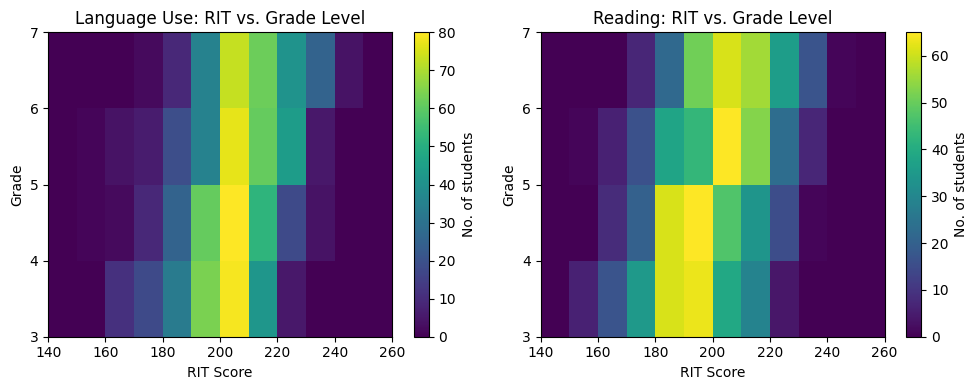

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4)) # figsize adjusts the figure size

h1 = axs[0].hist2d(kcislk_LangUse["TestRITScore"], kcislk_LangUse["Grade"], bins=(RITbins, Grdbins), cmap='viridis')
fig.colorbar(h1[3], ax=axs[0], label='No. of students')
axs[0].set_xlabel('RIT Score')
axs[0].set_ylabel('Grade')
axs[0].set_yticks(Grdbins)
axs[0].set_title('Language Use: RIT vs. Grade Level')

h2 = axs[1].hist2d(kcislk_Reading["TestRITScore"], kcislk_Reading["Grade"], bins=(RITbins, Grdbins), cmap='viridis')
fig.colorbar(h2[3], ax=axs[1], label='No. of students')
axs[1].set_xlabel('RIT Score')
axs[1].set_ylabel('Grade')
axs[1].set_yticks(Grdbins)
axs[1].set_title('Reading: RIT vs. Grade Level')

plt.tight_layout() # Adjust the layout to prevent titles and labels from overlapping
plt.show()         # Display the plot


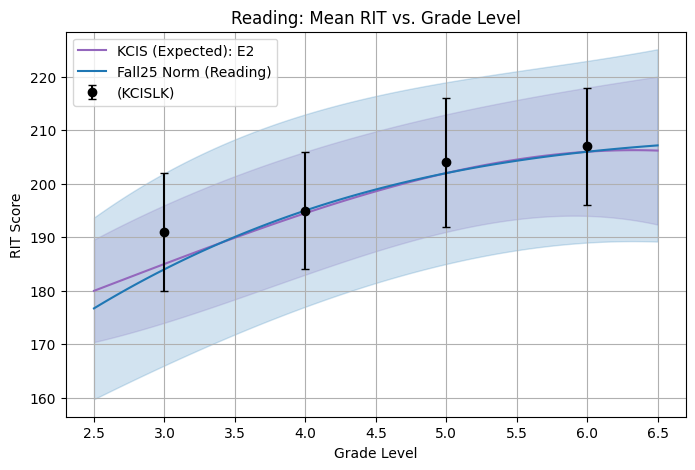

In [ ]:
kcisFall25GrdRIT_langUse = [201, 204, 209, 211]
kcisFall25GrdErr_langUse = [ 10,  9,    9,  10]

kcisFall25GrdRIT_langUse = [201, 204, 209, 211]
kcisFall25GrdErr_langUse = [ 10,  9,    9,  10]

kcisFall25GrdRIT_reading = [191, 195, 204, 207]
kcisFall25GrdErr_reading = [ 11,  11,  12,  11]

plt.figure(figsize=(8, 5))
# Plot the smooth line
plt.plot(x_grdFit, kcisRIT, color='tab:purple', label='KCIS (Expected): E2')
# Add the error band
plt.fill_between(x_grdFit, kcisRITm1SD, kcisRITp1SD, color='tab:purple', alpha=0.2)#, label='KCIS 1SD (E2)')
# Optionally, plot original points
#plt.scatter(Grds, kcisRITmid, color='purple')
plt.plot(x_grdFit, normFallRIT_reading,color='tab:blue', label='Fall25 Norm (Reading)')
plt.fill_between(x_grdFit, normFallRITm1SD_reading, normFallRITp1SD_reading, color='tab:blue', alpha=0.2)#, label='Fall 2025 1SD')
plt.errorbar(Grds, kcisFall25GrdRIT_reading, kcisFall25GrdErr_reading, fmt='o', color='black', label="(KCISLK)", capsize=3)

plt.grid(True)
plt.title('Reading: Mean RIT vs. Grade Level', )
plt.xlabel('Grade Level')
plt.ylabel('RIT Score')
plt.legend()
plt.show()

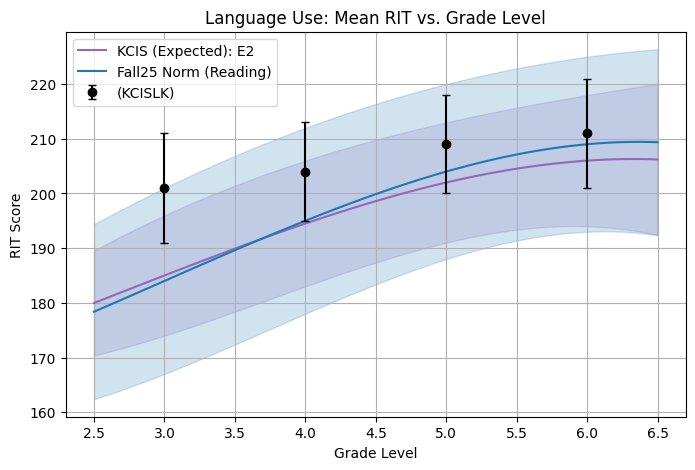

In [ ]:
kcisRITp1SD = kcisInterSpline(x_grdFit) + kcisErrInterSpline(x_grdFit)
kcisRITm1SD = kcisInterSpline(x_grdFit) - kcisErrInterSpline(x_grdFit)

#normFallInterSpline_reading = make_interp_spline(Grds, normFallRITmid_reading, k=3)
#normFallRIT_reading = normFallInterSpline_reading(x_grdFit)
normFallRITp1SD_reading = normFallInterSpline_reading(x_grdFit) + normFallErrInterSpline_reading(x_grdFit)
normFallRITm1SD_reading = normFallInterSpline_reading(x_grdFit) - normFallErrInterSpline_reading(x_grdFit)

#normFallRIT_langUse = normFallInterSpline_langUse(x_grdFit)
normFallRITp1SD_langUse = normFallInterSpline_langUse(x_grdFit) + normFallErrInterSpline_langUse(x_grdFit)
normFallRITm1SD_langUse = normFallInterSpline_langUse(x_grdFit) - normFallErrInterSpline_langUse(x_grdFit)

kcisFall25GrdRIT_langUse = [201, 204, 209, 211]
kcisFall25GrdErr_langUse = [ 10,  9,    9,  10]

kcisFall25GrdRIT_reading = [191, 195, 204, 207]
kcisFall25GrdErr_reading = [ 11,  11,  12,  11]

kcisFall25GrdRIT_reading = [191, 195, 204, 207]
kcisFall25GrdErr_reading = [ 11,  11,  12,  11]

plt.figure(figsize=(8, 5))
# Plot the smooth line
plt.plot(x_grdFit, kcisRIT, color='tab:purple', label='KCIS (Expected): E2')
# Add the error band
plt.fill_between(x_grdFit, kcisRITm1SD, kcisRITp1SD, color='tab:purple', alpha=0.2)#, label='KCIS 1SD (E2)')
# Optionally, plot original points
#plt.scatter(Grds, kcisRITmid, color='purple')
plt.plot(x_grdFit, normFallRIT_langUse,color='tab:blue', label='Fall25 Norm (Language Usage)')
plt.fill_between(x_grdFit, normFallRITm1SD_langUse, normFallRITp1SD_langUse, color='tab:blue', alpha=0.2)#, label='Fall 2025 1SD')
plt.errorbar(Grds, kcisFall25GrdRIT_langUse, kcisFall25GrdErr_langUse, fmt='o', color='black', label="(KCISLK)", capsize=3)

plt.grid(True)
plt.title('Language Use: Mean RIT vs. Grade Level', )
plt.xlabel('Grade Level')
plt.ylabel('RIT Score')
plt.legend()
plt.show()

## Grade-level Analysis

//----------G3 (KCISLK) = (252, 254), E3: <174, E1: > 196, Language Use Norm = 184±17, Reading Norm = 184±18----------


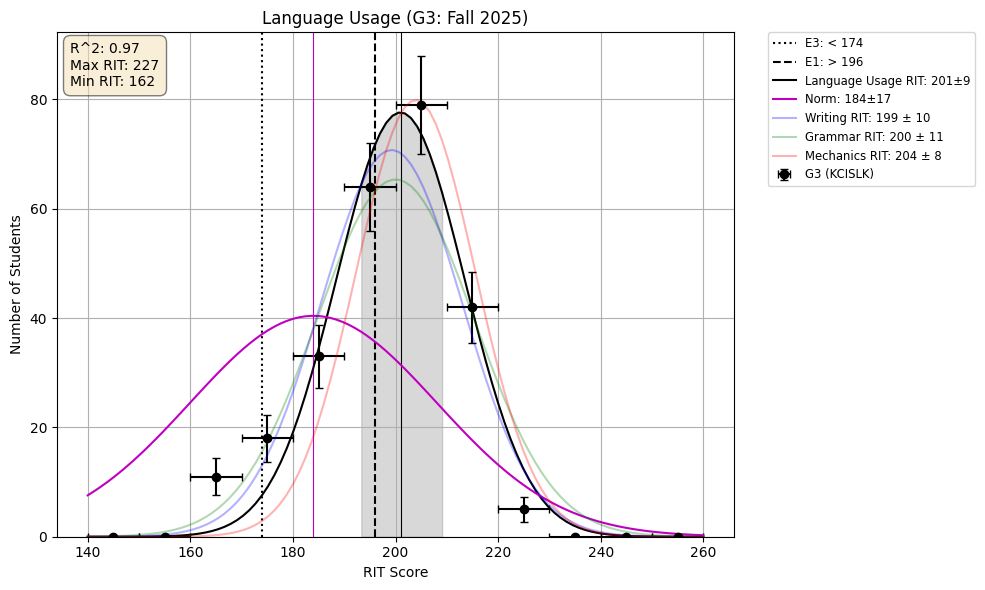

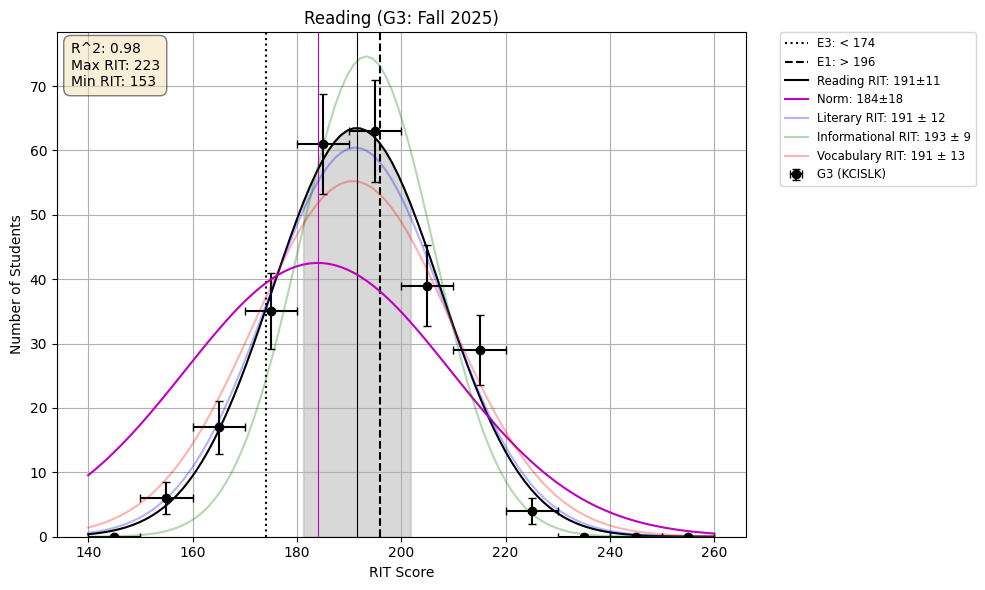

//----------G4 (KCISLK) = (252, 251), E3: <183, E1: > 206, Language Use Norm = 195±17, Reading Norm = 195±18----------


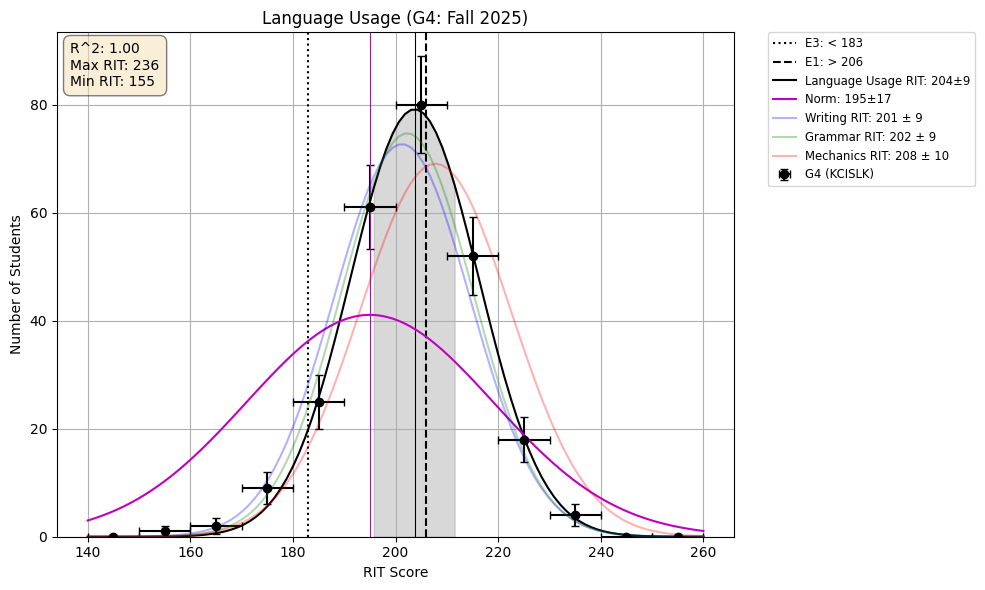

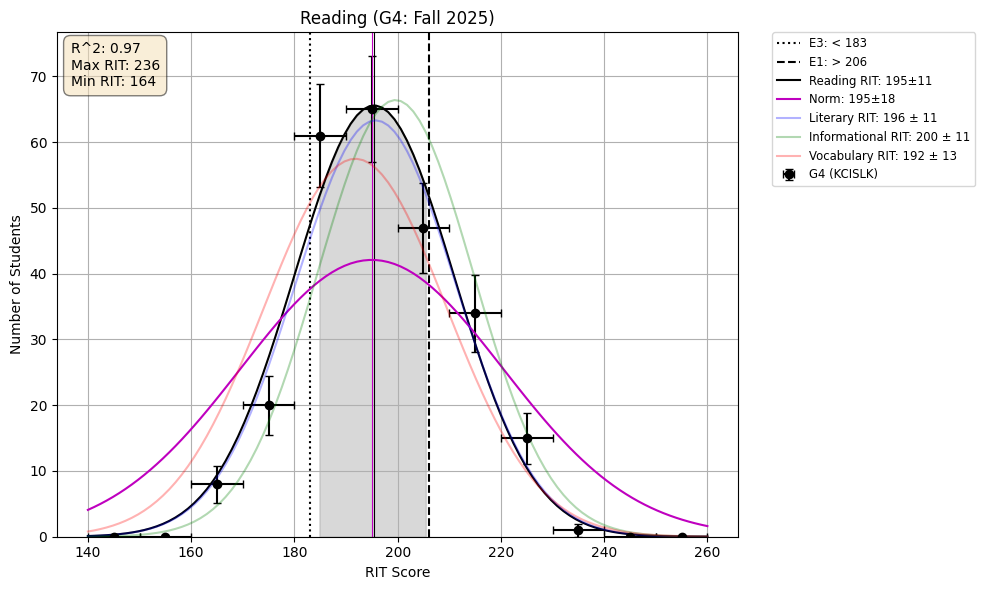

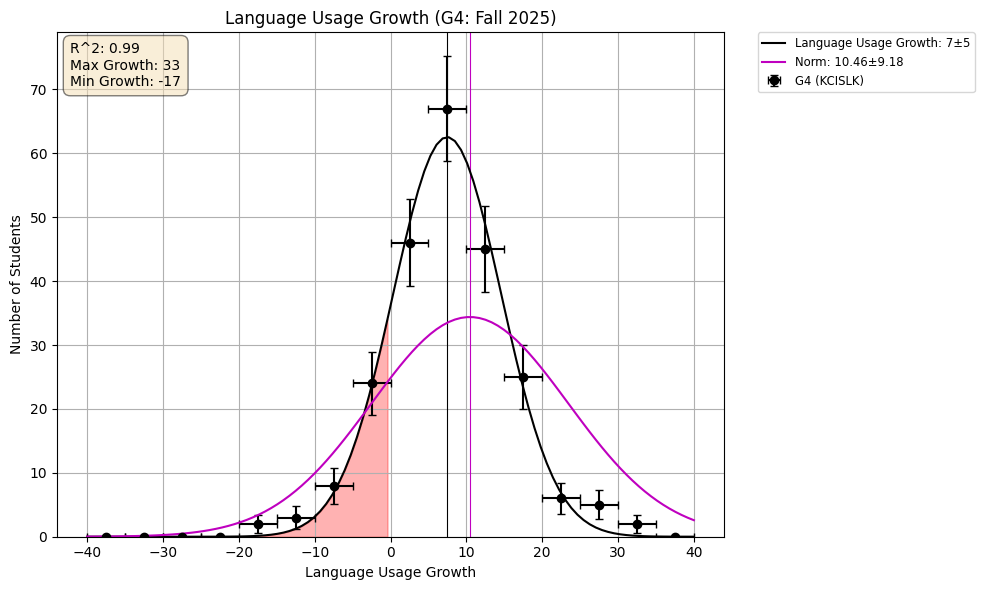

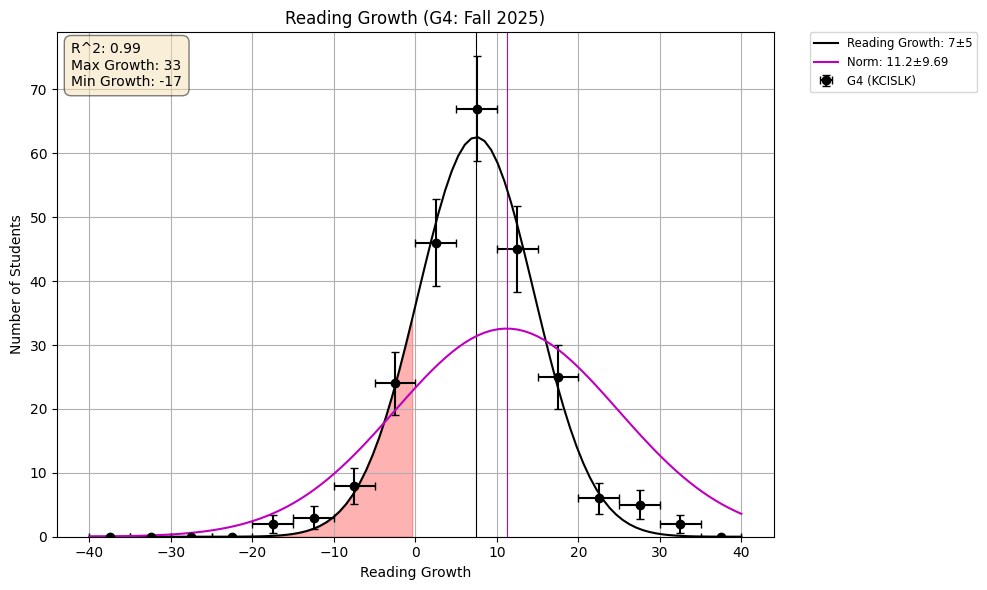

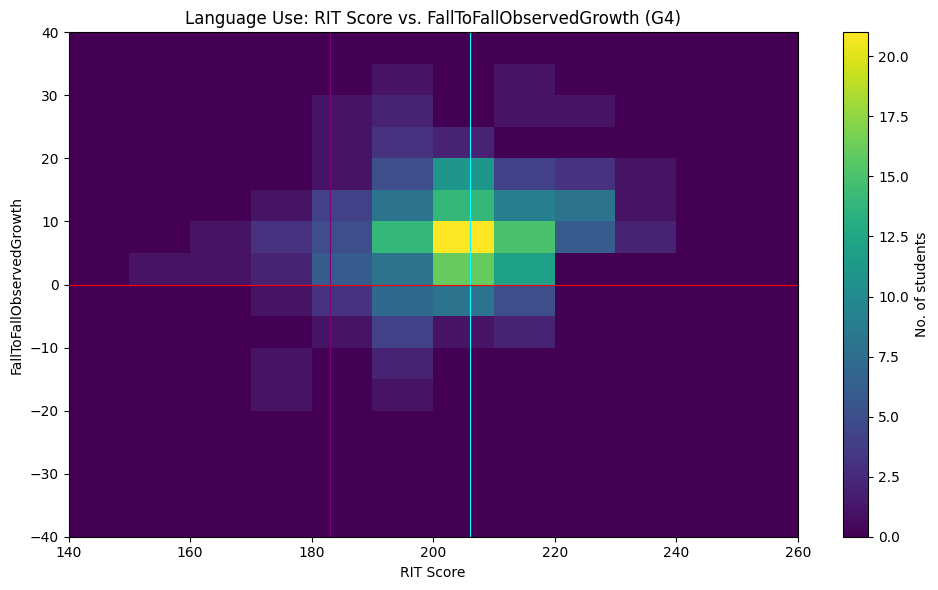

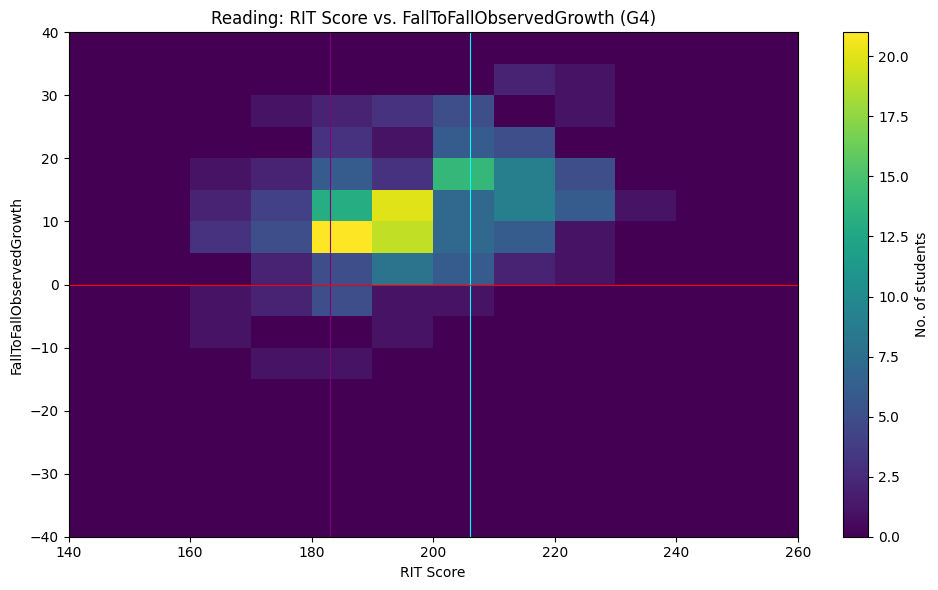

//----------G5 (KCISLK) = (252, 252), E3: <191, E1: > 213, Language Use Norm = 202±16, Reading Norm = 204±17----------


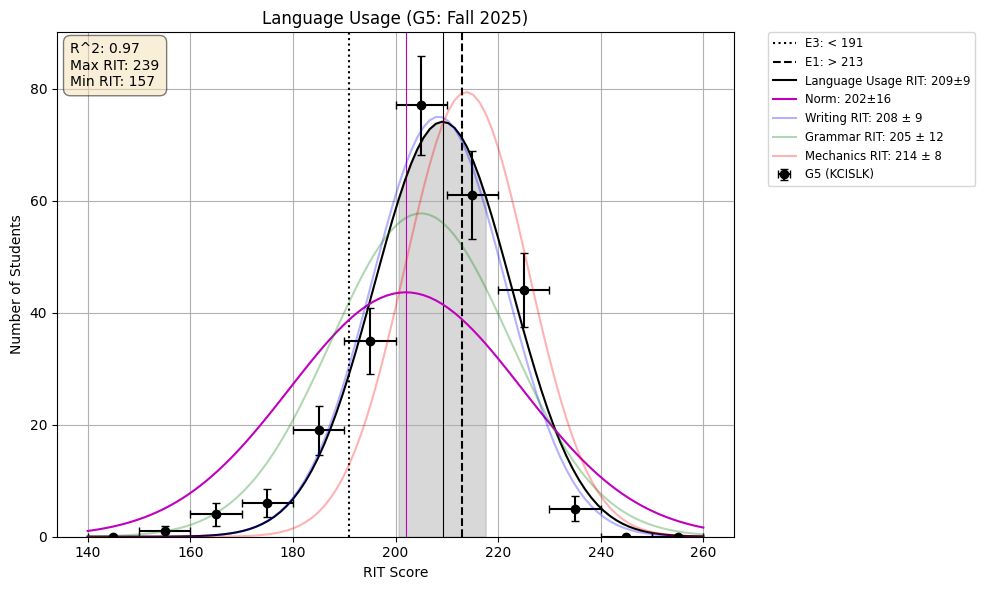

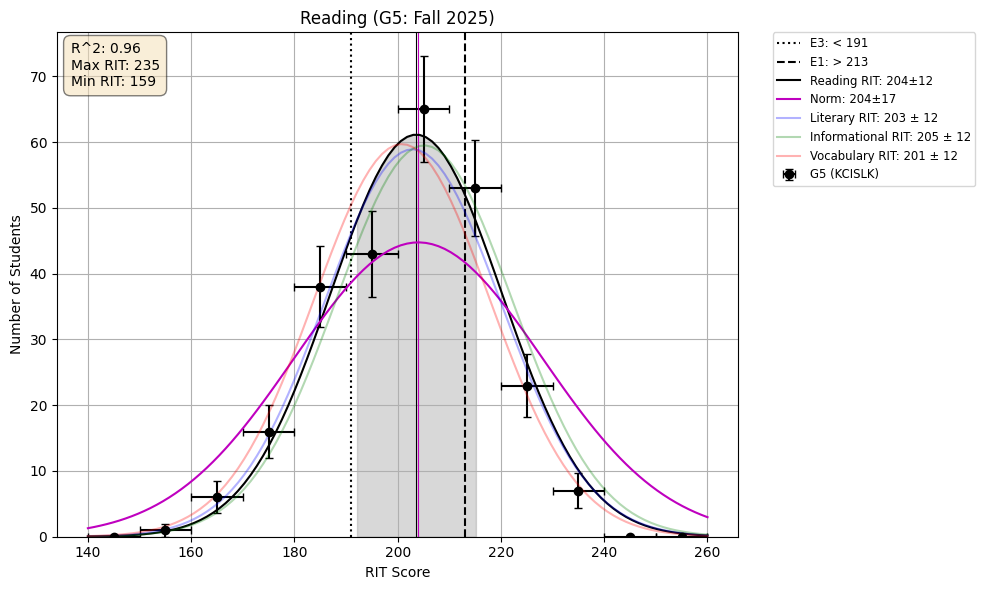

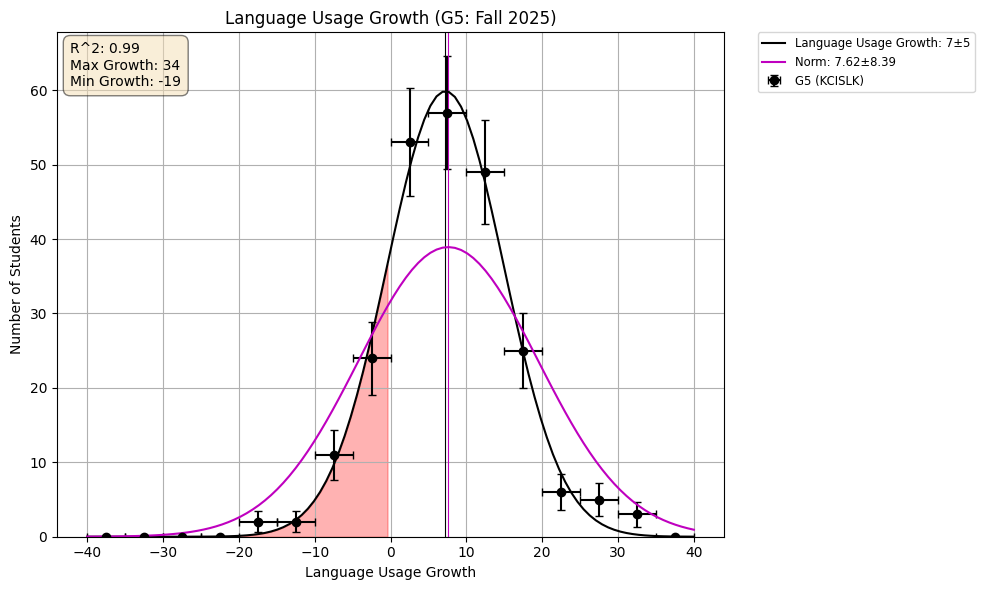

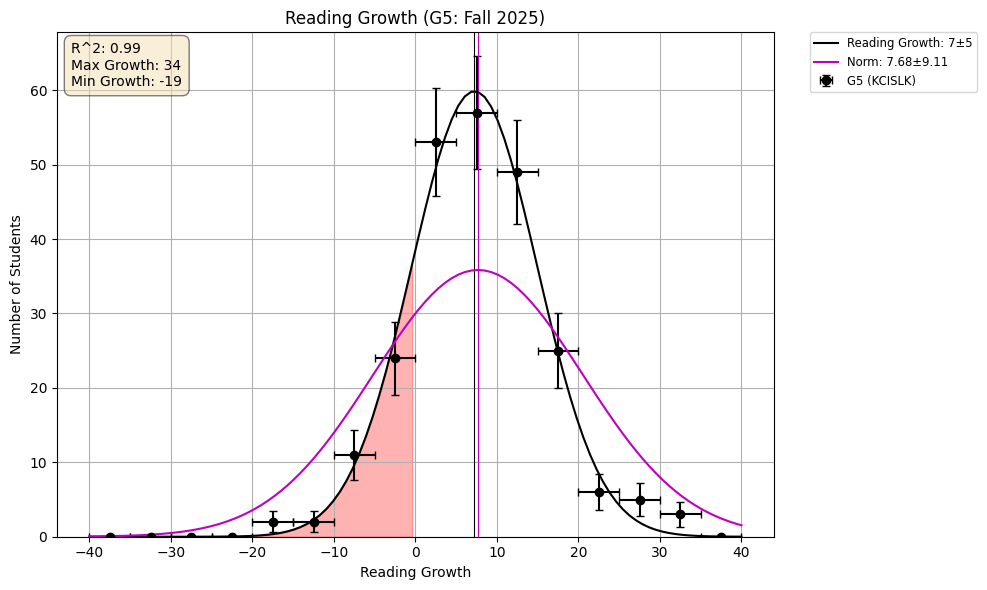

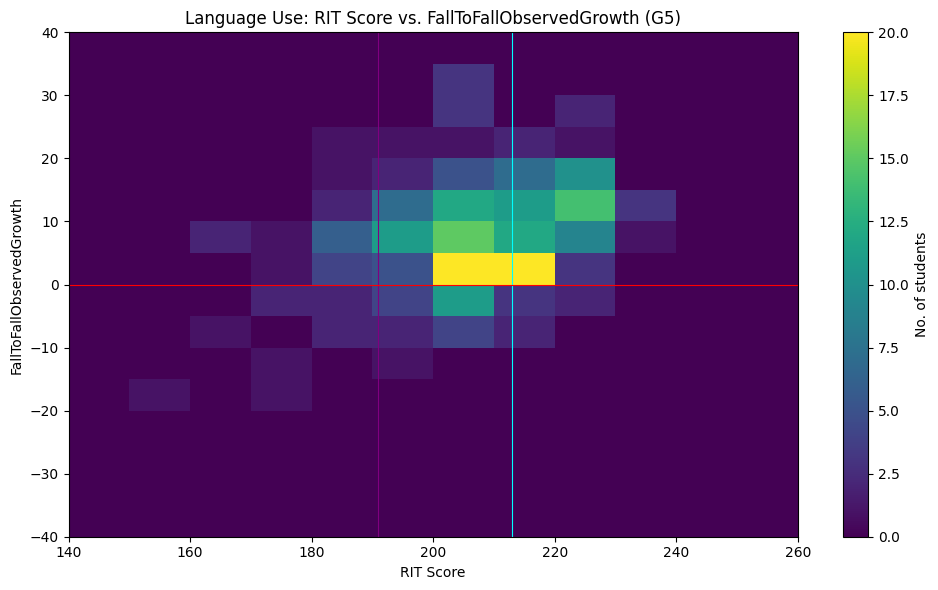

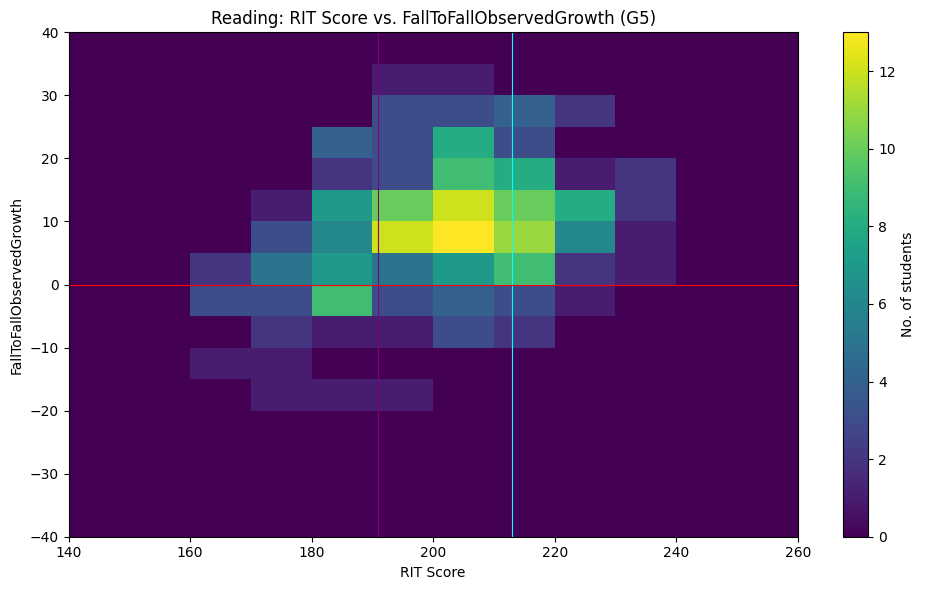

//----------G6 (KCISLK) = (251, 251), E3: <194, E1: > 218, Language Use Norm = 206±16, Reading Norm = 209±17----------


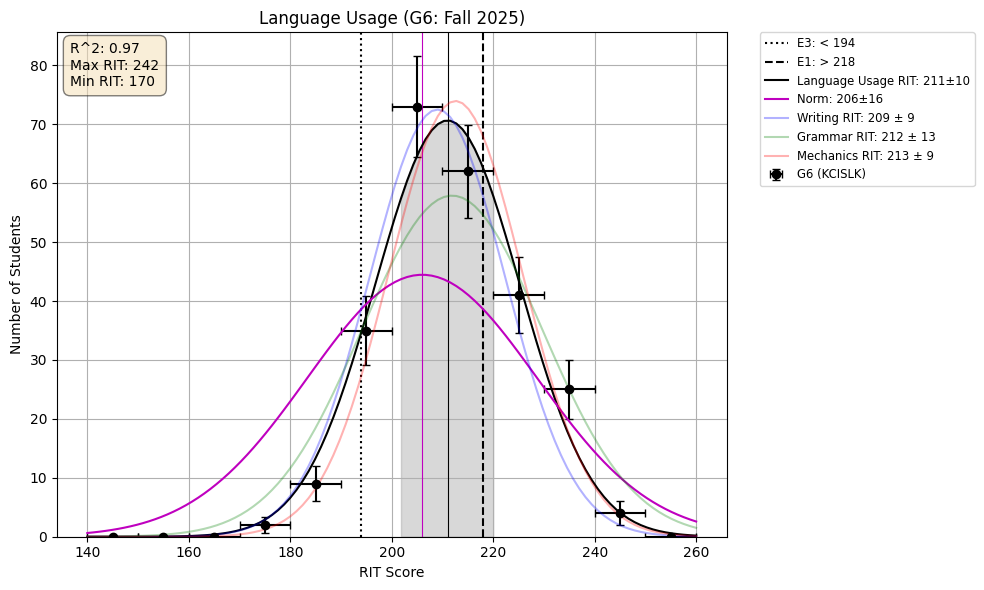

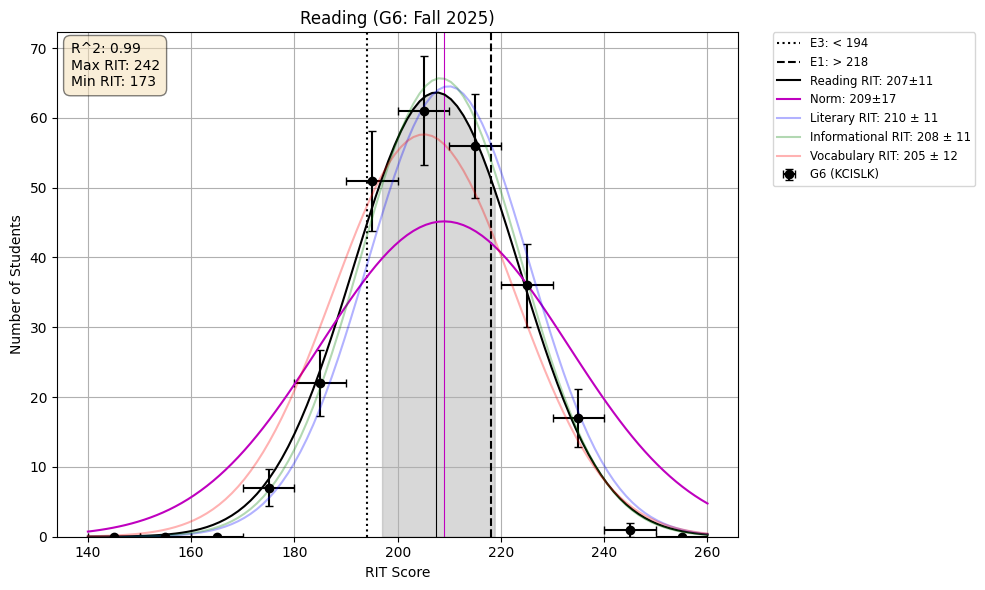

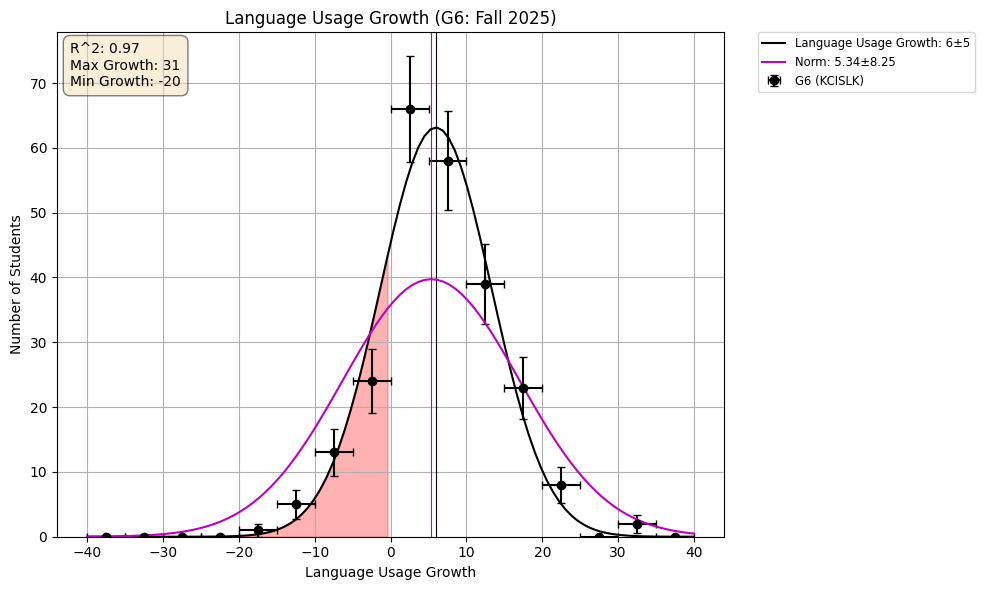

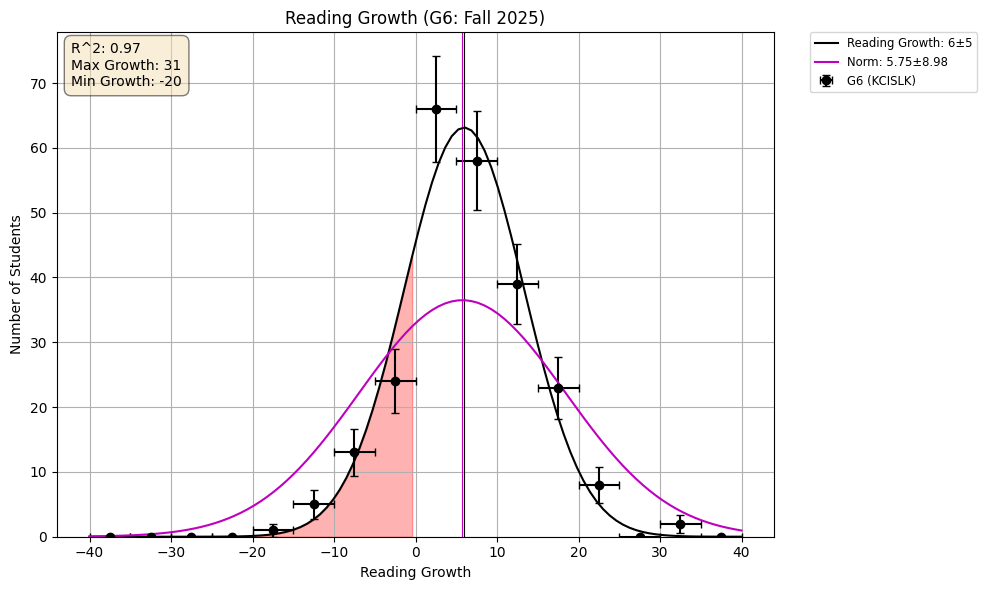

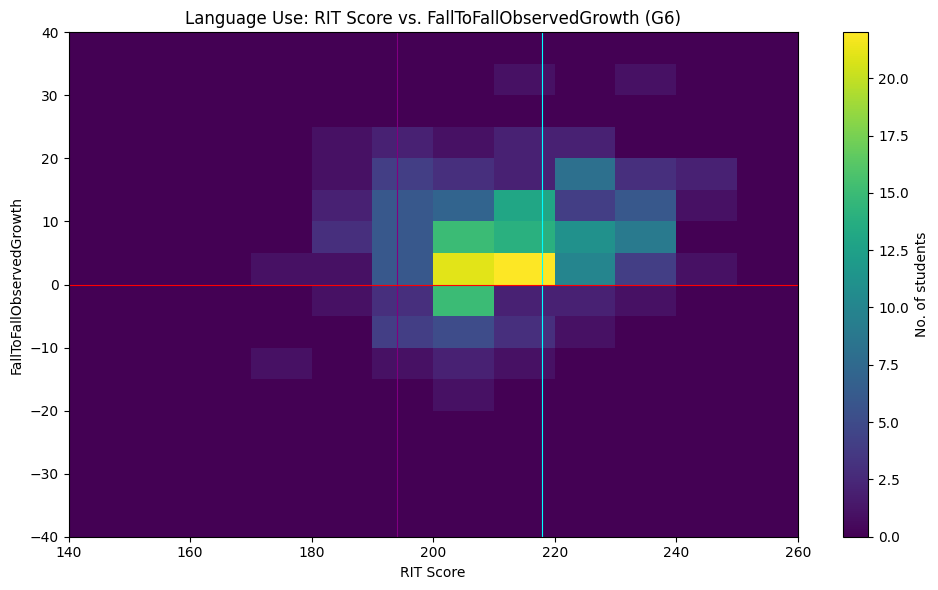

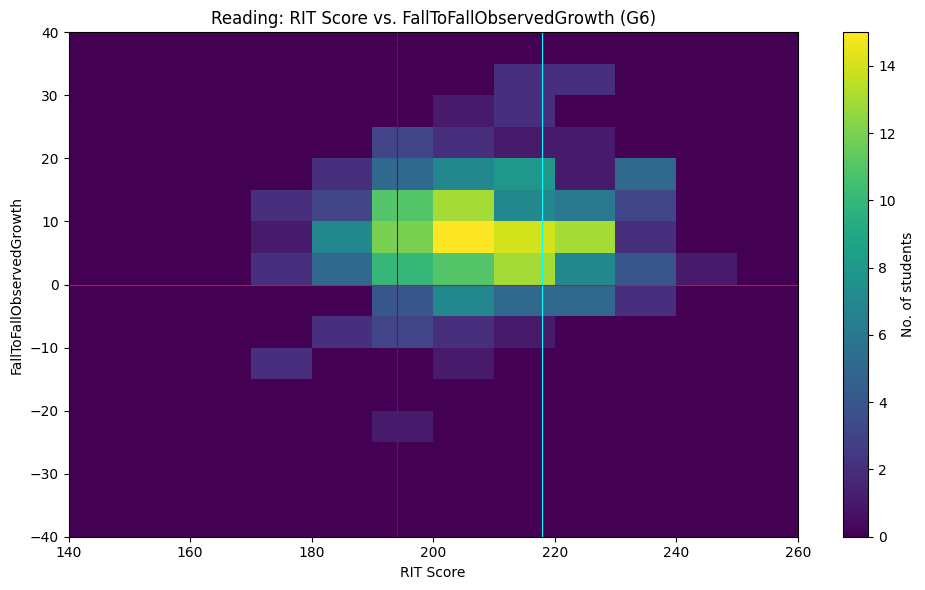

In [ ]:
for i in range(4):
  lv = i+3
  df_kcisLangUse = kcislk_LangUse[kcislk_LangUse["Grade"] == lv]
  df_kcisReading = kcislk_Reading[kcislk_Reading["Grade"] == lv]

  kcisE3Benchmark = kcis_RITbenchmarks[i][0]
  kcisE1Benchmark = kcis_RITbenchmarks[i][1]

  normLangUseMean = norm2025_LangUse_RITmean[lv + (3*i)]
  normLangUseStDv = norm2025_LangUse_RITstdv[lv + (3*i)]
  normReadingMean = norm2025_Reading_RITmean[lv + (3*i)]
  normReadingStDv = norm2025_Reading_RITstdv[lv + (3*i)]

  normLangUseGrowthMean = norm2025_LangUse_GrwthFatoFaMean[i+1]
  normLangUseGrowthStDv = norm2025_LangUse_GrwthFatoFaMean[i+1]
  normReadingGrowthMean = norm2025_Reading_GrwthFatoFaMean[i+1]
  normReadingGrowthStDv = norm2025_Reading_GrwthFatoFaMean[i+1]

  #normLangUseMean = norm2025_LangUse_RITmean[0][i]
  #normLangUseStDv = norm2025_LangUse_RITstdv[0][i]
  #normReadingMean = norm2025_Reading_RITmean[0][i]
  #normReadingStDv = norm2025_Reading_RITstdv[0][i]
  #normLangUseGrowthMean = norm2025_LangUse_Growthmean[3][i]
  #normLangUseGrowthStDv = norm2025_LangUse_Growthstdv[3][i]
  #normReadingGrowthMean = norm2025_Reading_Growthmean[3][i]
  #normReadingGrowthStDv = norm2025_Reading_Growthstdv[3][i]

  print(f"//----------G{lv} (KCISLK) = ({len(df_kcisLangUse)}, {len(df_kcisReading)}), E3: <{kcisE3Benchmark}, E1: > {kcisE1Benchmark}, Language Use Norm = {normLangUseMean}±{normLangUseStDv}, Reading Norm = {normReadingMean}±{normReadingStDv}----------")

  hLangUse        = df_kcisLangUse["TestRITScore"]
  hLangUseGrowth  = df_kcisLangUse["FallToFallObservedGrowth"]
  hReading        = df_kcisReading["TestRITScore"]
  hReadingGrowth  = df_kcisReading["FallToFallObservedGrowth"]

  hWriting        = df_kcisLangUse["Goal1RitScore"]
  hGrammar        = df_kcisLangUse["Goal2RitScore"]
  hMechanics      = df_kcisLangUse["Goal3RitScore"]

  hInformational  = df_kcisReading["Goal2RitScore"]
  hLiterary       = df_kcisReading["Goal1RitScore"]
  hVocabulary     = df_kcisReading["Goal3RitScore"]

  fig1 = plotFit(lv, df_kcisLangUse,  normLangUseMean, normLangUseStDv, kcisE3Benchmark, kcisE1Benchmark, 'Language Usage')
  fig2 = plotFit(lv, df_kcisReading,  normReadingMean, normReadingStDv, kcisE3Benchmark, kcisE1Benchmark, 'Reading')
  if i != 0:
    fig3 = plotFit(lv, df_kcisLangUse,  normLangUseGrowthMean, normLangUseGrowthStDv, kcisE3Benchmark, kcisE1Benchmark, 'Language Usage Growth')
    fig4 = plotFit(lv, df_kcisLangUse,  normReadingGrowthMean, normReadingGrowthStDv, kcisE3Benchmark, kcisE1Benchmark, 'Reading Growth')

    fig5 = plot2D(lv, hLangUse, hLangUseGrowth, 'Language Use', 'TestRITScore', 'FallToFallObservedGrowth', RITticks, Grwticks, RITbins, Grwbins, kcisE3Benchmark, kcisE1Benchmark)
    fig6 = plot2D(lv, hReading, hReadingGrowth, 'Reading',      'TestRITScore', 'FallToFallObservedGrowth', RITticks, Grwticks, RITbins, Grwbins, kcisE3Benchmark, kcisE1Benchmark)

    #fig5 = plotFit(lv, df_kcisLangUse,  normLangUseGrowthMean, normLangUseGrowthStDv, kcisE3Benchmark, kcisE1Benchmark, 'Language Usage Growth (Spring to Fall)')
    #fig6 = plotFit(lv, df_kcisLangUse,  normReadingGrowthMean, normReadingGrowthStDv, kcisE3Benchmark, kcisE1Benchmark, 'Reading Growth (Spring to Fall)')

  #fig1 = performFit(lv, df_kcisReading, df_kcisLangUse, kcisE3Benchmark, kcisE1Benchmark, normReadingMean, normReadingStDv, normLangUseMean, normLangUseStDv)
  #fig2 = plotRITvsLangUseRIT(lv, hLangUse, hGrammar, hMechanics, hWriting)
  #fig3 = plotRITvsReadingRIT(lv, hReading, hInformational, hLiterary,  hVocabulary)


# Scratch


In [ ]:


norm2025_LangUse_RITmean = [[184, 195, 202, 206], [190, 198, 205, 209], [193, 201, 207, 210]]
norm2025_LangUse_RITstdv = [[ 17,  17,  16,  16], [ 17,  16,  16,  16], [ 17,  16,  16,  16]]
norm2025_LangUse_Growthmean = [[5, 4, 3, 2], [4, 3, 2, 2], [9, 7, 5, 4], [14.65, 10.46, 7.62, 5.34]] #Fall-to-fall, Fall-to-winter, #Winter-to-spring, Fall-to-spring
norm2025_LangUse_Growthstdv = [[8, 8, 8, 8], [8, 8, 7, 8], [9, 8, 8, 8], [10.12,  9.18, 8.39, 8.25]]

norm2025_Reading_RITmean   = [[184, 195, 204, 209], [190, 199, 206, 211], [194, 202, 208, 212]]
norm2025_Reading_RITstdv   = [[ 18,  18,  17,  17], [ 18,  18,  17,  17], [ 18,  18,  17,  17]]
norm2025_Reading_Growthmean = [[5, 4, 3, 2], [4, 3, 2, 1], [9, 6, 5, 3], [14.98, 11.20, 7.68, 5.75]] #Fall-to-fall, Fall-to-winter, #Winter-to-spring, Fall-to-spring
norm2025_Reading_Growthstdv = [[9, 8, 8, 8], [9, 8, 8, 8], [9, 9, 9, 8], [10.50,  9.69, 9.11, 8.98]]

# 2025 Norms (G3-6) [Fall, Winter, Spring] [row[col]] = [row][col]
norm2025_weeksOfInstruction = [4, 20, 32] #Fall, Winter, Spring (out of 43 weeks in total per grade; starts from 0)

kcisRITp1SD = kcisInterSpline(x_grdFit) + kcisErrInterSpline(x_grdFit)
kcisRITm1SD = kcisInterSpline(x_grdFit) - kcisErrInterSpline(x_grdFit)

normFallInterSpline_reading = make_interp_spline(Grds, normFallRITmid_reading, k=3)
normFallRIT_reading = normFallInterSpline_reading(x_grdFit)
kcisErrInterSpline = make_interp_spline(Grds, kcisRITerr, k=3)
kcisErr = kcisErrInterSpline(x_grdFit)

normFallRITp1SD_reading = normFallInterSpline_reading(x_grdFit) + normFallErrInterSpline_reading(x_grdFit)
normFallRITm1SD_reading = normFallInterSpline_reading(x_grdFit) - normFallErrInterSpline_reading(x_grdFit)

normFallRITp1SD_langUse = normFallInterSpline_langUse(x_grdFit) + normFallErrInterSpline_langUse(x_grdFit)
normFallRITm1SD_langUse = normFallInterSpline_langUse(x_grdFit) - normFallErrInterSpline_langUse(x_grdFit)


norm2025_weeksOfInstruction = [    4,     20,     32,
                                43+4,  43+20,  43+32,
                                86+4,  86+20,  86+32,
                               129+4, 129+20, 129+32] #Fall, Winter, Spring (out of 43 weeks in total per grade; starts from 0)
norm2025_LangUse_RITmeans = [184.05, 192.65, 199.10,
                             197.03, 204.48, 210.07,
                             206.23, 211.82, 216.01,
                             210.23, 216.00, 220.33]

# KCIS Leveling benchmarks G3-12
kcis_RITbenchmarks = [[174, 196], [183, 206], [191, 213], [194, 218], [190, 211, 220, 224], [190, 213, 224, 227], [216, 227, 231], [216, 227, 231], [218, 230, 233], [218, 230, 233]]

kcisRITmid = [174+((196-174)/2), 183+((206-183)/2), 191+((213-191)/2), 194+((218-194)/2)]
kcisRITerr = [(196-174)/2, (206-183)/2, (213-191)/2, (218-194)/2]

kcisInterSpline = make_interp_spline(Grds, kcisRITmid, k=3)
kcisRIT = kcisInterSpline(x_grdFit)
kcisErrInterSpline = make_interp_spline(Grds, kcisRITerr, k=3)
kcisErr = kcisErrInterSpline(x_grdFit)

normFallRITmid_reading  = [184,    195,    202,    206]
normFallRITerr_reading  = [18,     18,     17,     17]

normFallErrInterSpline_reading = make_interp_spline(Grds, normFallRITerr_reading, k=3)
normFallErr_reading = normFallErrInterSpline_reading(x_grdFit)

normFallRITmid_langUse  = [184,    195,    204,    209]
normFallRITerr_langUse  = [17,     17,     16,     16]

normFallInterSpline_langUse = make_interp_spline(Grds, normFallRITmid_langUse, k=3)
normFallRIT_langUse = normFallInterSpline_langUse(x_grdFit)
normFallErrInterSpline_langUse = make_interp_spline(Grds, normFallRITerr_langUse, k=3)
normFallErr_langUse = normFallErrInterSpline_langUse(x_grdFit)

normSpringRITmid_reading  = [194,    202,    208,    212]
normSpringRITerr_reading  = [18,     18,     17,     17]

normSpringInterSpline_reading = make_interp_spline(Grds, normSpringRITmid_reading, k=3)
normSpringRIT_reading = normSpringInterSpline_reading(x_grdFit)

normSpringRITmid_langUse  = [193,    201,    207,    210]
normSpringRITerr_langUse  = [17,     16,     16,     16]

normSpringInterSpline_langUse = make_interp_spline(Grds, normSpringRITmid_langUse, k=3)
normSpringRIT_langUse = normSpringInterSpline_langUse(x_grdFit)



In [ ]:
#sp25_mapFile = '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/177341729.csv' #Spring 2025
#fl25_mapFile = '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/177341729.csv' #Fall
#mapSpring25 = pd.read_csv(sp25_mapFile)
#mapFall25   = pd.read_csv(fl25_mapFile)

sprg25MAP_file0 = '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/177341729.csv'
fall25MAP_file0 = '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/179242305.csv'
fall25MAP_file1 = '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/AssessmentResults.csv'
fall25MAP_file2 = '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/ClassAssignments.csv'
fall25MAP_file3 = '/content/drive/My Drive/ES-ID/MAP Growth 2025-2026/Fall 2025/StudentsBySchool.csv'

mapSprg25  = pd.read_csv(sprg25MAP_file0)
mapFall25  = pd.read_csv(fall25MAP_file0)
mapFall251 = pd.read_csv(fall25MAP_file1)
mapFall252 = pd.read_csv(fall25MAP_file2)
mapFall253 = pd.read_csv(fall25MAP_file3)

mapSprg25["Language Use: Grammar - RIT Score 10 Point Range"]   = pd.to_numeric(mapSprg25["Language Arts: Language: Understand, Edit for Grammar, Usage"].str.extract(r'(\d+)')[0], errors='coerce')
mapSprg25["Language Use: Mechanics - RIT Score 10 Point Range"] = pd.to_numeric(mapSprg25["Language Arts: Language: Understand, Edit for Mechanics"].str.extract(r'(\d+)')[0], errors='coerce')
mapSprg25["Language Use: Writing - RIT Score 10 Point Range"]   = pd.to_numeric(mapSprg25["Language Arts: Writing: Write, Revise Texts for Purpose and Audience"].str.extract(r'(\d+)')[0], errors='coerce')

mapSprg25["Reading: Informational Text - RIT Score 10 Point Range"] = pd.to_numeric(mapSprg25["Language Arts: Informational Text"].str.extract(r'(\d+)')[0], errors='coerce')
mapSprg25["Reading: Literary Text - RIT Score 10 Point Range"]      = pd.to_numeric(mapSprg25["Language Arts: Literary Text"].str.extract(r'(\d+)')[0], errors='coerce')
mapSprg25["Reading: Vocabulary - RIT Score 10 Point Range"]         = pd.to_numeric(mapSprg25["Language Arts: Vocabulary"].str.extract(r'(\d+)')[0], errors='coerce')

mapFall25["Language Use: Grammar - RIT Score 10 Point Range"]   = pd.to_numeric(mapFall25["Language Arts: Language: Understand, Edit for Grammar, Usage"].str.extract(r'(\d+)')[0], errors='coerce')
mapFall25["Language Use: Mechanics - RIT Score 10 Point Range"] = pd.to_numeric(mapFall25["Language Arts: Language: Understand, Edit for Mechanics"].str.extract(r'(\d+)')[0], errors='coerce')
mapFall25["Language Use: Writing - RIT Score 10 Point Range"]   = pd.to_numeric(mapFall25["Language Arts: Writing: Write, Revise Texts for Purpose and Audience"].str.extract(r'(\d+)')[0], errors='coerce')

mapFall25["Reading: Informational Text - RIT Score 10 Point Range"] = pd.to_numeric(mapFall25["Language Arts: Informational Text"].str.extract(r'(\d+)')[0], errors='coerce')
mapFall25["Reading: Literary Text - RIT Score 10 Point Range"]      = pd.to_numeric(mapFall25["Language Arts: Literary Text"].str.extract(r'(\d+)')[0], errors='coerce')
mapFall25["Reading: Vocabulary - RIT Score 10 Point Range"]         = pd.to_numeric(mapFall25["Language Arts: Vocabulary"].str.extract(r'(\d+)')[0], errors='coerce')

# Display the first few rows of the DataFrame
print(mapFall25.head())
#print(f"Instructional Area data type: {mapSpring25["Language Arts: Language: Understand, Edit for Grammar, Usage"].dtype}")

  Student ID Student Last Name Student First Name  Student Middle Initial  \
0    LE12176       Una_LE12176               Chen                     NaN   
1    LE12112   CHIN HE_LE12112              CHANG                     NaN   
2    LE12235       Rex_LE12235                 Tu                     NaN   
3    LE12173    Sophie_LE12173               Chen                     NaN   
4    LE12253    Winter_LE12253                Liu                     NaN   

      Term Tested   Term Rostered  \
0  Fall 2025-2026  Fall 2025-2026   
1  Fall 2025-2026  Fall 2025-2026   
2  Fall 2025-2026  Fall 2025-2026   
3  Fall 2025-2026  Fall 2025-2026   
4  Fall 2025-2026  Fall 2025-2026   

                                           School  Grade        Subject  \
0  Kang Chiao International School--Linkou Campus      3  Language Arts   
1  Kang Chiao International School--Linkou Campus      3  Language Arts   
2  Kang Chiao International School--Linkou Campus      3  Language Arts   
3  Kang Chiao 

In [ ]:
columns_to_merge = [
    'StudentID',
    'Course',
    'TestDurationMinutes',
    'TestRITScore',
    'TestStandardError',
    'TestPercentile',
    'AchievementQuintile',
    'PercentCorrect',
    'RapidGuessingPercentage',
    'FallToFallProjectedGrowth',
    'FallToFallObservedGrowth',
    'FallToFallObservedGrowthSE',
    'FallToFallConditionalGrowthIndex',
    'FallToFallConditionalGrowthPercentile',
    'FallToFallGrowthQuintile',
    'LexileScore',
    'LexileMin',
    'LexileMax',
    'Goal1Name',
    'Goal1RitScore',
    'Goal1StdErr',
    'Goal1Range',
    'Goal1Adjective',
    'Goal2Name',
    'Goal2RitScore',
    'Goal2StdErr',
    'Goal2Range',
    'Goal2Adjective',
    'Goal3Name',
    'Goal3RitScore',
    'Goal3StdErr',
    'Goal3Range',
    'Goal3Adjective'
]

# Select only the columns needed for merging from mapFall251
mapFall251_selected = mapFall251[columns_to_merge]

# Perform the left merge
mapFall25 = pd.merge(mapFall25, mapFall251_selected,
                     left_on=['Student ID', 'Course'],
                     right_on=['StudentID', 'Course'],
                     how='left')

# Drop the redundant 'StudentID' column from mapFall25 after merge
mapFall25 = mapFall25.drop(columns=['StudentID'], errors='ignore')

# Display the first few rows of the updated mapFall25 DataFrame to verify
print(mapFall25.head())

# Language Use - Filter AFTER merge
kcislk_LangUse = mapFall25[mapFall25["Test Name"] == "Growth: Language 2+ AERO 2015 1.1"]
G3kcis_LangUse    = kcislk_LangUse[kcislk_LangUse["Grade"] == 3]
G4kcis_LangUse    = kcislk_LangUse[kcislk_LangUse["Grade"] == 4]
G5kcis_LangUse    = kcislk_LangUse[kcislk_LangUse["Grade"] == 5]
G6kcis_LangUse    = kcislk_LangUse[kcislk_LangUse["Grade"] == 6]
G3to6kcis_LangUse = [G3kcis_LangUse, G4kcis_LangUse, G5kcis_LangUse, G6kcis_LangUse]

# Reading - Filter AFTER merge
G35kcis_Reading = mapFall25[mapFall25["Test Name"] == "Growth: Reading 2-5 AERO 2015 1.1"]
G6pkcis_Reading = mapFall25[mapFall25["Test Name"] == "Growth: Reading 6+ AERO 2015 1.1"]
kcislk_Reading  = pd.concat([G35kcis_Reading, G6pkcis_Reading])

G3kcis_Reading    = G35kcis_Reading[G35kcis_Reading["Grade"] == 3]
G4kcis_Reading    = G35kcis_Reading[G35kcis_Reading["Grade"] == 4]
G5kcis_Reading    = G35kcis_Reading[G35kcis_Reading["Grade"] == 5]
G6kcis_Reading    = G6pkcis_Reading[G6pkcis_Reading["Grade"] == 6]
G3to6kcis_Reading = [G3kcis_Reading, G4kcis_Reading, G5kcis_Reading, G6kcis_Reading]

  Student ID Student Last Name Student First Name  Student Middle Initial  \
0    LE12176       Una_LE12176               Chen                     NaN   
1    LE12112   CHIN HE_LE12112              CHANG                     NaN   
2    LE12235       Rex_LE12235                 Tu                     NaN   
3    LE12173    Sophie_LE12173               Chen                     NaN   
4    LE12253    Winter_LE12253                Liu                     NaN   

      Term Tested   Term Rostered  \
0  Fall 2025-2026  Fall 2025-2026   
1  Fall 2025-2026  Fall 2025-2026   
2  Fall 2025-2026  Fall 2025-2026   
3  Fall 2025-2026  Fall 2025-2026   
4  Fall 2025-2026  Fall 2025-2026   

                                           School  Grade        Subject  \
0  Kang Chiao International School--Linkou Campus      3  Language Arts   
1  Kang Chiao International School--Linkou Campus      3  Language Arts   
2  Kang Chiao International School--Linkou Campus      3  Language Arts   
3  Kang Chiao 